In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification

# Datasets, Report by: KHOUTAIBI Iliass


In the first cell, we provide four toy datasets for classification, featuring both linear and non-linear decision frontiers. Using decision trees, random forests, and AdaBoost, we will develop and analyze classifiers capable of handling non-linear decision boundaries.


We also provide in the second cell auxiliary code for plotting the decision boundaries of the trees, called `plot_tree`. 


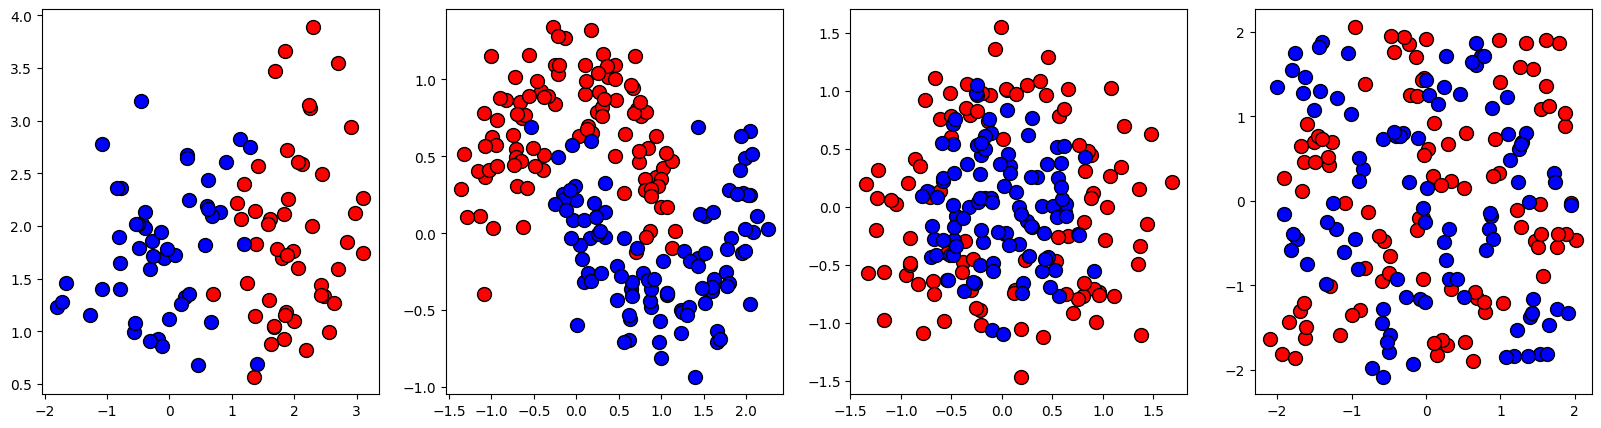

In [2]:
def rand_checkers(n1=100, n2=100, sigma=0.1):
    """ Sample n1 and n2 points from a noisy checker"""
    nbp = int(np.floor(n1 / 8))
    nbn = int(np.floor(n2 / 8))
    xapp = np.reshape(np.random.rand((nbp + nbn) * 16), [(nbp + nbn) * 8, 2])
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if (((i + j) % 2) == 0):
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 2 + 1] * nb
            xapp[idx:(idx + nb), 0] = np.random.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * np.random.randn(nb)
            xapp[idx:(idx + nb), 1] = np.random.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * np.random.randn(nb)
            idx += nb
    ind = np.arange((nbp + nbn) * 8)
    np.random.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])-1

plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1),
            rand_checkers()]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)
dataset = datasets[1]


In [3]:
def plot_tree(clf,X,y):
  n_classes = 2
  plot_colors = "rb"
  plot_step = 0.02
  plt.figure(figsize=(3,3))   
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  # Plot the training points
  for i, color in zip([-1,1], plot_colors):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, alpha=.2)
  plt.show()

# Impurity measures
## Exercises 1, 2, 3

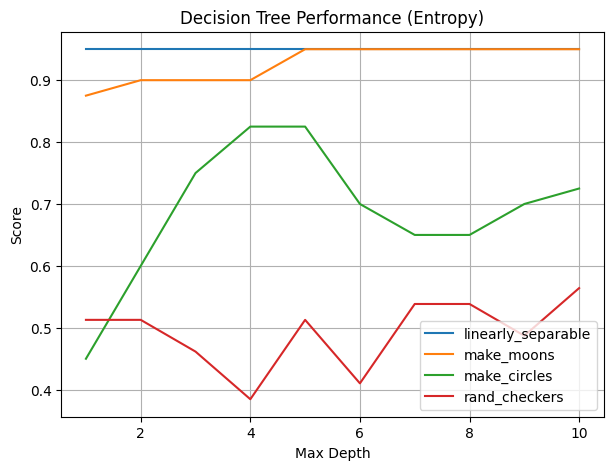

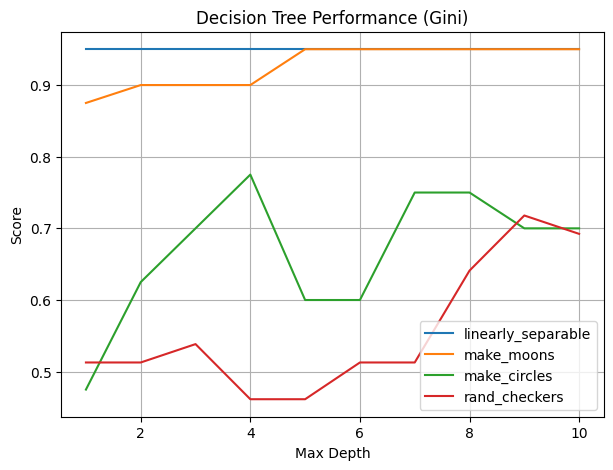

best impurity classification


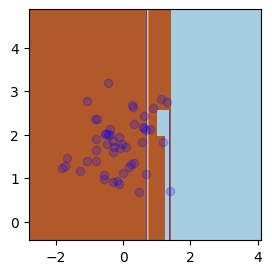

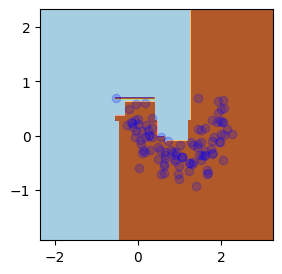

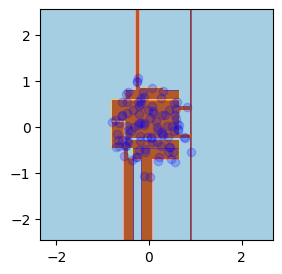

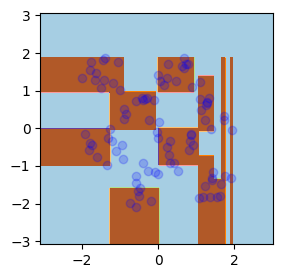

Classifying the dataset 2 using the entropy impurity and best score for the said dataset


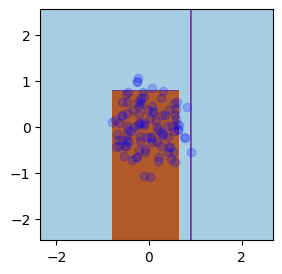

In [4]:
scores_gini = []
scores_entropy = []


for fi in range(len(datasets)):
    max_depth_list_gini = []
    max_depth_list_entropy = []
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
    
    for i in range(1,11):
        gini = DecisionTreeClassifier(criterion='gini',max_depth=i)
        entropy = DecisionTreeClassifier(criterion='entropy',max_depth=i)
        gini.fit(X_train,y_train)
        entropy.fit(X_train,y_train)
        score_gini = gini.score(X_test,y_test)
        score_entropy = entropy.score(X_test,y_test)
        max_depth_list_gini.append(score_gini)
        max_depth_list_entropy.append(score_entropy)    
    
    scores_gini.append(max_depth_list_gini)
    scores_entropy.append(max_depth_list_entropy)

scores_entropy = np.array(scores_entropy)
scores_gini = np.array(scores_gini) 



label = ['linearly_separable', 'make_moons', 'make_circles', 'rand_checkers']

num_datasets = 4

plt.figure(figsize=(7, 5))
plt.ylabel("Score")
plt.xlabel("Max Depth")
for i in range(num_datasets):
    plt.plot(range(1, 11), scores_entropy[i, :], label=label[i])  # Fix x-axis values

plt.legend()
plt.title("Decision Tree Performance (Entropy)")
plt.grid()
plt.show()

plt.figure(figsize=(7, 5))
plt.ylabel("Score")
plt.xlabel("Max Depth")
for i in range(num_datasets):
    plt.plot(range(1, 11), scores_gini[i, :], label=label[i])  

plt.legend()
plt.title("Decision Tree Performance (Gini)")
plt.grid()
plt.show()

# Question 2
print(f"best impurity classification")
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    best_tree.fit(X,y)
    plot_tree(best_tree, X, y)

# Question 3
print(f"Classifying the dataset 2 using the entropy impurity and best score for the said dataset")
dataset_2 = datasets[2]
best_tree_circle = DecisionTreeClassifier(criterion='entropy', max_depth=np.argmax(scores_entropy[2,:]))
X = dataset_2[0]
y = dataset_2[1]
best_tree_circle.fit(X,y)
plot_tree(best_tree_circle, X, y)


# Ensembles
## Exercise 4, random forest

In [5]:
import numpy as np
from sklearn.datasets import  load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import shuffle


# Load datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Evaluate on Diabetes dataset (Regression)
X_diabetes, y_diabetes = shuffle(diabetes.data, diabetes.target, random_state=0)
regressor = RandomForestRegressor()
scores_regression  = cross_val_score(regressor, X_diabetes, y_diabetes, cv=5) 
R_sqr = np.mean(scores_regression)
print(f"R^2 in the case of regression is : {R_sqr}")



# Evaluate on Iris dataset (Classification)
X_iris, y_iris = shuffle(iris.data, iris.target, random_state=0)
regressor_classifier = RandomForestClassifier()
scores_classification = cross_val_score(regressor_classifier, X_iris, y_iris, cv=5, scoring='accuracy')
accuracy = np.mean(scores_classification)
print(f"accuarcy using the random forest for Iris is: {accuracy}")


# Evaluate on Digits dataset (Classification)
X_digits, y_digits = shuffle(digits.data, digits.target, random_state=0)
regressor_classifier = RandomForestClassifier()
scores_classification = cross_val_score(regressor_classifier, X_digits, y_digits, cv=5)
accuracy = np.mean(scores_classification)
print(f"accuarcy using the random forest for digits is: {accuracy}")


R^2 in the case of regression is : 0.424120511366629
accuarcy using the random forest for Iris is: 0.96
accuarcy using the random forest for digits is: 0.9749613122872176


## Exercise 5, feature importance

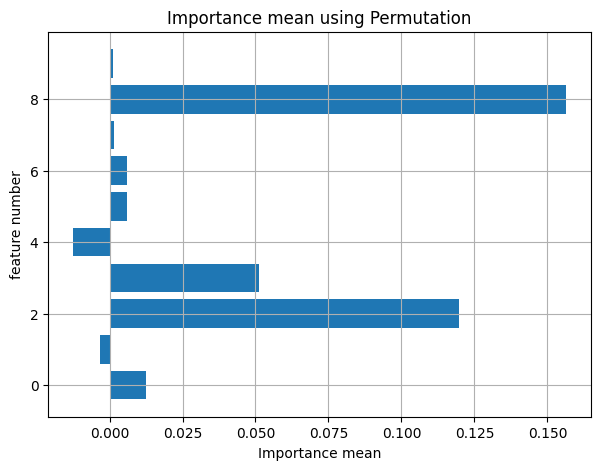

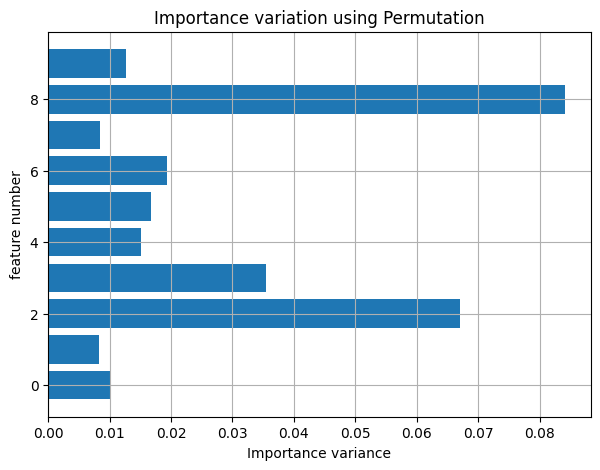

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
result = permutation_importance(regressor, X_test, y_test, n_repeats=30 ,random_state=0)


importances = result.importances_mean
variance = result.importances_std

plt.figure(figsize=(7,5))
plt.barh(range(len(importances)), importances)
plt.xlabel("Importance mean")
plt.ylabel("feature number")
plt.title("Importance mean using Permutation")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.barh(range(len(importances)), variance)
plt.xlabel("Importance variance")
plt.ylabel("feature number")
plt.title("Importance variation using Permutation")
plt.grid()
plt.show()



As we can see form the previous plots, we can see that some features have bigger variance than others, this means that we could do the classification/Training only on a subset using Singular Value decomposition !

It is better then to reduce the dimension of our model in order to decrease the load/training time.

# Regression
## Exercise 6

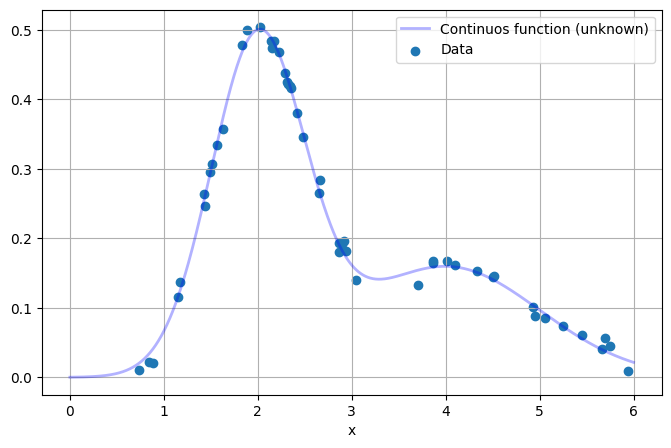

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean_1, std_1 = 2, 0.5  
mean_2, std_2 = 4, 1    
weight_1 = 0.6  
weight_2 = 0.4  
x = np.linspace(0, 6, 1000)
pdf_1 = norm.pdf(x, mean_1, std_1)
pdf_2 = norm.pdf(x, mean_2, std_2)
mixture_pdf = weight_1 * pdf_1 + weight_2 * pdf_2
plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="Continuos function (unknown)", alpha=.3, color="blue", lw=2)
plt.xlabel("x")
plt.grid(True)
Xr = np.sort(6 * np.random.rand(50))  
pdf_1 = norm.pdf(Xr, mean_1, std_1)
pdf_2 = norm.pdf(Xr, mean_2, std_2)
yr = weight_1 * pdf_1 + weight_2 * pdf_2
yr += np.random.normal(0,.01,len(yr))
plt.scatter(Xr, yr,label="Data")
plt.legend()
plt.show()

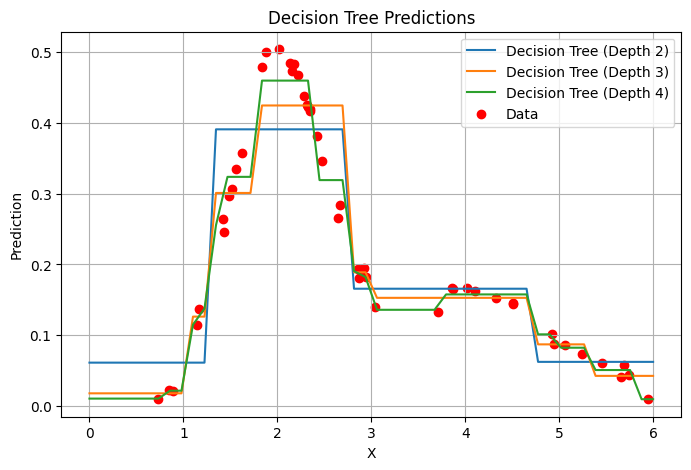

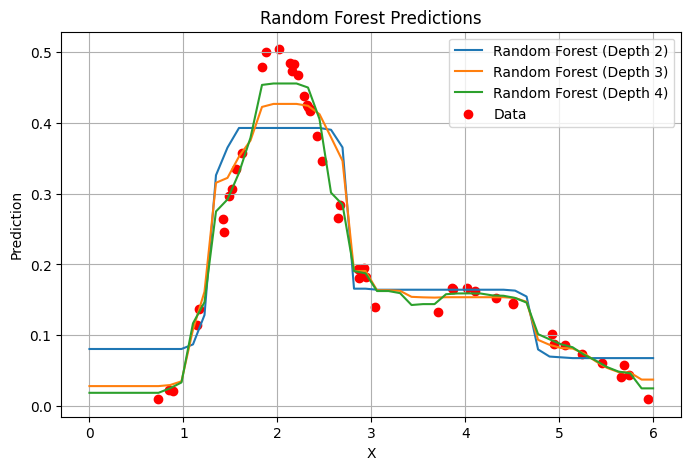

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


X = np.array(Xr).reshape(-1, 1)
y = np.array(yr).reshape(-1, 1)

# Generate test data
X_test = np.linspace(0, 6, 50).reshape(-1, 1)

prediction_tree = []
prediction_forest = []


for i in [2, 3, 4]:
    regressor_tree = DecisionTreeRegressor(max_depth=i)
    regressor_forest = RandomForestRegressor(max_depth=i) 

    regressor_tree.fit(X, y.ravel())
    regressor_forest.fit(X, y.ravel())

    prediction_tree.append(regressor_tree.predict(X_test))
    prediction_forest.append(regressor_forest.predict(X_test))

prediction_forest = np.array(prediction_forest)
prediction_tree = np.array(prediction_tree)

plt.figure(figsize=(8, 5))
for i in range(len(prediction_tree)):
    plt.plot(X_test, prediction_tree[i, :], label=f"Decision Tree (Depth {i+2})")

plt.scatter(X, y, color="red", label="Data")
plt.xlabel("X")
plt.ylabel("Prediction")
plt.title("Decision Tree Predictions")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(8, 5))
for i in range(len(prediction_forest)):
    plt.plot(X_test, prediction_forest[i, :], label=f"Random Forest (Depth {i+2})")

plt.scatter(X, y, color="red", label="Data")
plt.xlabel("X")
plt.ylabel("Prediction")
plt.title("Random Forest Predictions")
plt.legend()
plt.grid()
plt.show()




# AdaBoost + stump (bonus question)
## Exercise 7 (+13)

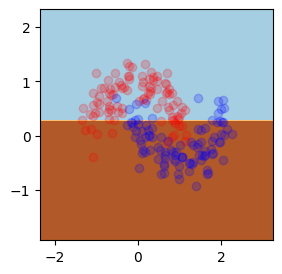

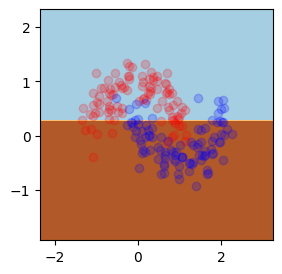

In [9]:
import numpy as np
from sklearn import tree

class My_stump:
  
  def __init__(self):
    self.best_dimension = None
    self.best_threshold = None
    self.class_below_threshold = None
    self.class_above_threshold = None
    self.best_ev = float("inf")  

  def get_threshold(self): 
      return self.best_threshold

  def get_best(self): 
      return self.best_dimension, self.best_threshold, self.best_ev
    
  def fit(self, X, y, sample_weight=None): 
    if sample_weight is None: 
        sample_weight = np.ones(len(X))
    
    best_ev = float("inf")  # Correction ici
    n_samples, n_features = X.shape

    for dimension in range(n_features):  
        sorted_indices = np.argsort(X[:, dimension])
        X_sorted = X[sorted_indices, dimension]
        y_sorted = y[sorted_indices]
        weight_sorted = sample_weight[sorted_indices]

        total_weight_left = 0
        total_weight_right = np.sum(weight_sorted)

        sum_left = 0
        sum_right = np.sum(y_sorted * weight_sorted)

        for i in range(1, n_samples):  
            xi, yi, wi = X_sorted[i], y_sorted[i], weight_sorted[i]

            total_weight_left += wi
            total_weight_right -= wi

            sum_left += yi * wi
            sum_right -= yi * wi

            if X_sorted[i] == X_sorted[i - 1]:  
                continue  

            class_below = 1 if sum_left >= 0 else -1
            class_above = 1 if sum_right >= 0 else -1

            error_left = np.sum(weight_sorted[:i] * (y_sorted[:i] != class_below).astype(int))
            error_right = np.sum(weight_sorted[i:] * (y_sorted[i:] != class_above).astype(int))
            total_error = error_left + error_right

            if total_error < best_ev:
                best_ev = total_error
                self.best_dimension = dimension
                self.best_threshold = (X_sorted[i] + X_sorted[i - 1]) / 2 
                self.class_below_threshold = class_below
                self.class_above_threshold = class_above
    
    self.best_ev = best_ev  

  def predict(self, X):
    if self.best_dimension is None:
        raise ValueError("The model has not been fitted yet!")

    res = []
    for x in X[:, self.best_dimension]:
        if x < self.best_threshold:
            res.append(self.class_below_threshold)
        else:
            res.append(self.class_above_threshold)
    
    return np.array(res)


# Exemple d'utilisation
dataset = datasets[1]
X = dataset[0]
y = dataset[1] * 2 - 1  # Conversion y={0,1} en y={-1,+1} pour AdaBoost
w = np.ones(len(X))/len(X)

my_stump = My_stump()
my_stump.fit(X, y, w)
plot_tree(my_stump, X, y)

# Vérification avec un arbre de décision profondeur 1
clf = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
plot_tree(clf, X, y)


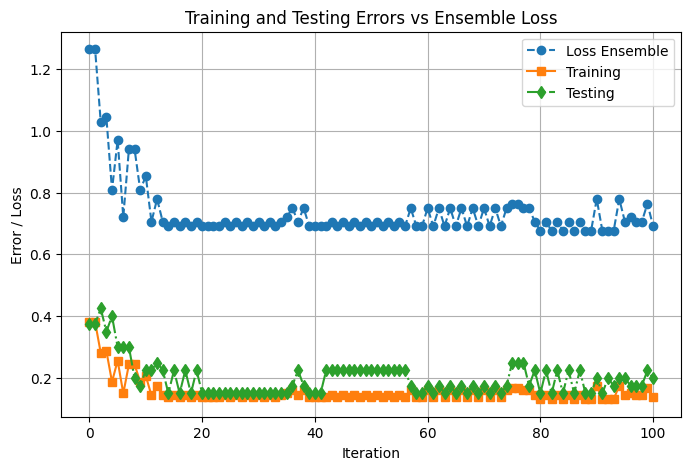

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def compute_error(y, y_pred, w_m):
    """Calcule l'erreur pondérée des prédictions."""
    return np.sum(w_m * (y != y_pred)) / np.sum(w_m)

def compute_alpha(error):
    """Calcule l'importance du classificateur faible."""
    if error == 0:
        return 1  
    return 0.5 * np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred, error):
    """Met à jour les poids des échantillons pour la prochaine itération."""
    return w_i * np.exp(-alpha * y * y_pred)

class AdaBoost:
    def __init__(self):
        self.alphas = []  
        self.G_M = []  
        self.M = None  
        self.training_errors = []
        self.testing_errors = []
        self.loss_ensemble = []

    def predict(self, X):
        """Prédit la classe des échantillons en combinant les classificateurs faibles."""
        final_prediction = np.zeros(X.shape[0])
        for alpha, G_m in zip(self.alphas, self.G_M):
            final_prediction += alpha * G_m.predict(X)
        return np.sign(final_prediction)  # Retourne -1 ou +1

    def fit(self, X, y, M=1, X_test=None, y_test=None):
        """Entraîne AdaBoost avec M itérations."""
        self.alphas = []
        self.G_M = []
        self.training_errors, self.testing_errors = [], []
        self.M = M

    
        w_m = np.ones(len(y)) / len(y)

        for m in range(M):
            G_m = DecisionTreeClassifier(max_depth=1)
            G_m.fit(X, y, sample_weight=w_m)
            y_pred = G_m.predict(X)

            error_m = compute_error(y, y_pred, w_m)
            alpha_m = compute_alpha(error_m)

            
            w_m = update_weights(w_m, alpha_m, y, y_pred, error_m)
            w_m /= np.sum(w_m)  

            self.G_M.append(G_m)
            self.alphas.append(alpha_m)

            # Calcul des erreurs pour l'affichage
            train_pred = self.predict(X)
            train_error = np.mean(train_pred != y)
            self.training_errors.append(train_error)

            if X_test is not None and y_test is not None:
                test_pred = self.predict(X_test)
                test_error = np.mean(test_pred != y_test)
                self.testing_errors.append(test_error)
            
            # Calcul de la perte de l'ensemble (log loss)
            loss = np.sum(np.exp(-y * train_pred)) / len(y)
            self.loss_ensemble.append(loss)


dataset = datasets[2]
X = dataset[0]
y = dataset[1] * 2 - 1  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ab = AdaBoost()
ab.fit(X_train, y_train, M=101, X_test=X_test, y_test=y_test)


plt.figure(figsize=(8, 5))
plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
plt.plot(ab.training_errors, label="Training", linestyle="-", marker="s")
plt.plot(ab.testing_errors, label="Testing", linestyle="-.", marker="d")
plt.xlabel("Iteration")
plt.ylabel("Error / Loss")
plt.title("Training and Testing Errors vs Ensemble Loss")
plt.legend()
plt.grid(True)
plt.show()


# AUC ROC - AUC PR

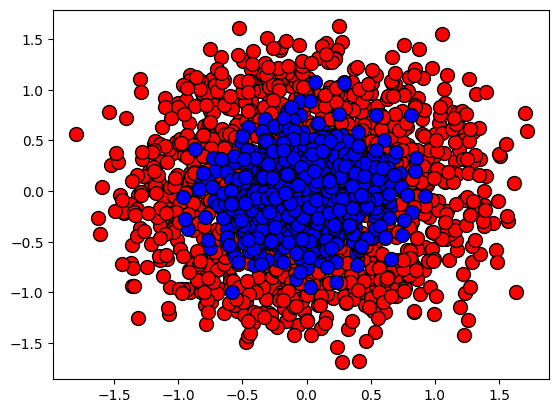

In [11]:
X,y = make_circles(n_samples = 2000, noise=0.3, factor=0.1)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr(proba, y_true):
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_true, proba)         ### Your code here ### 
    roc_auc = auc(fpr, tpr)              ### Your code here ### 
    
    # Compute Precision-Recall curve and PR AUC
    precision, recall, _ = precision_recall_curve(y_true, proba) ### Your code here ### 
    pr_auc = average_precision_score(y_true, proba)               ### Your code here ### 
    
    # Plot ROC Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()
    
def subsample_data(X, y, keep_ratio=0.4):
    """Subsample dataset to keep all class 1 and only a fraction of class 0."""
    class_1_mask = y == 0
    class_0_mask = y == 1
    X_class_1 = X[class_1_mask]
    y_class_1 = y[class_1_mask]
    X_class_0 = X[class_0_mask]
    y_class_0 = y[class_0_mask]
    np.random.seed(0)
    sample_indices = np.random.choice(len(X_class_0), int(len(X_class_0) * keep_ratio), replace=False)
    X_class_0 = X_class_0[sample_indices]
    y_class_0 = y_class_0[sample_indices]
    X_subsampled = np.vstack((X_class_1, X_class_0))
    y_subsampled = np.hstack((y_class_1, y_class_0))
    return X_subsampled, y_subsampled
    

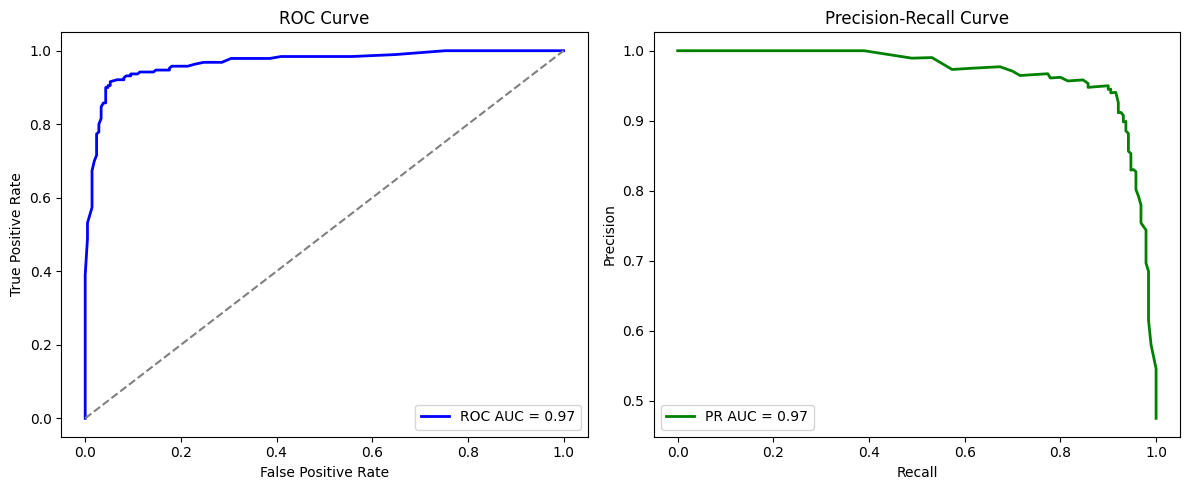

In [13]:
classifier = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
classifier.fit(X_train, y_train)
proba = classifier.predict_proba(X_test)[:,1]
plot_roc_pr(proba, y_test)

In [14]:
classifier = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
classifier.fit(X_train, y_train)
proba = classifier.predict_proba(X_test)
print(f"The probabilities to be part of one of the two classes is:\n {proba}")

The probabilities to be part of one of the two classes is:
 [[0.   1.  ]
 [0.96 0.04]
 [0.85 0.15]
 [0.99 0.01]
 [0.99 0.01]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.02 0.98]
 [0.83 0.17]
 [0.38 0.62]
 [0.92 0.08]
 [0.   1.  ]
 [0.64 0.36]
 [0.06 0.94]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [1.   0.  ]
 [0.86 0.14]
 [0.17 0.83]
 [0.98 0.02]
 [0.04 0.96]
 [0.   1.  ]
 [0.25 0.75]
 [0.01 0.99]
 [0.98 0.02]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.96 0.04]
 [0.   1.  ]
 [0.77 0.23]
 [0.75 0.25]
 [0.   1.  ]
 [0.74 0.26]
 [0.07 0.93]
 [0.   1.  ]
 [0.9  0.1 ]
 [0.   1.  ]
 [0.98 0.02]
 [0.57 0.43]
 [0.06 0.94]
 [0.26 0.74]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.04 0.96]
 [1.   0.  ]
 [0.49 0.51]
 [1.   0.  ]
 [1.   0.  ]
 [0.19 0.81]
 [0.99 0.01]
 [0.87 0.13]
 [0.08 0.92]
 [0.01 0.99]
 [0.97 0.03]
 [0.07 0.93]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.97 0.03]
 [0.99 0.01]
 [0.05 0.95]
 [0.64 0.36]
 [0.99 0.01]
 [0.22 0.78]
 [0.

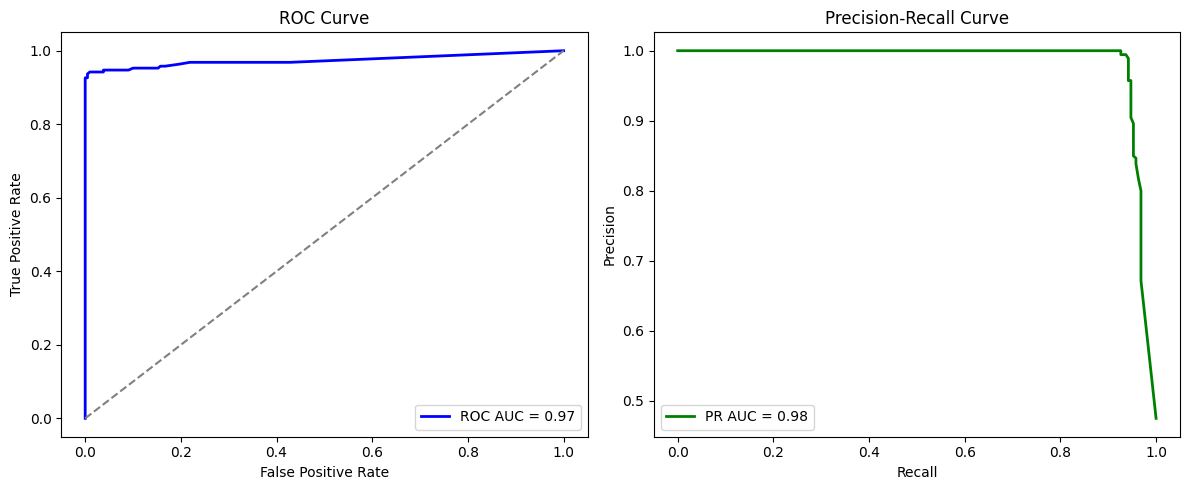

In [15]:
X_sample , y_sample = subsample_data(X, y) 
classifier.fit(X_sample, y_sample)
proba = classifier.predict_proba(X_test)[:,1]
plot_roc_pr(proba, y_test)

As we can see, balancing the data set makes the Roc/PR Curve sharper, this is a great improvement compared to training the model on the whole trianing set.

11. Express the precision, recall, false positive rate, and true positive rate as conditional probabilities
on the true class labels Y and predicted class labels predicted labels $\hat{Y}$.  

**Precision:**
Precision is the proportion of correct positive predictions out of all positive predictions so precision = $\mathbb{P}(Y = 1 | \hat Y$ = 1)$
- **Recall:**
Recall is the proportion of positive instances correctly identified so recall = $\mathbb{P}(\hat Y = 1 | Y = 1)$
- **False Positive Rate:**
False positive rate is the proportion of negative instances incorrectly classified as positive so FPR = P($\hat Y$ = 1 | Y = 0)
- **True Positive Rate:**
True positive rate is identical to recall so TPR = $\mathbb{P}(\hat Y = 1 | Y = 1)$



12. Express the F1-score as the harmonic mean of two of the above quantities.

$$F_1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
$$F_1 = 2 \times \frac{P(Y = 1 | \hat Y = 1) \times P(\hat Y = 1 | Y = 1)}{P(Y = 1 | \hat Y = 1) + P(\hat Y = 1 | Y = 1)}$$